# Volve G&G Dataset

The "Volve" oil field is an offshore oil and gas field located in the North Sea, approximately 190 kilometers west of Stavanger, Norway. It was discovered in 1993 and production began in 2008. The field is owned and operated by Equinor (formerly known as Statoil), which is one of the largest energy companies in the world. The field has estimated recoverable reserves of around 190 million barrels of oil equivalent, and produces mainly crude oil. Volve is a relatively small field compared to some of the other offshore fields in the North Sea, but it is still an important asset for Equinor and for Norway's overall oil and gas industry.


In [1]:
from IPython.display import Image
Image(url="https://www.norskpetroleum.no/factpages/3420717.jpg", width=700)

# What kind of well-logs we will use?

-  **NPHI** (neutron porosity): It is used to estimate the amount of fluids (usually hydrocarbons) contained in the rock formation by measuring the amount of neutron radiation that is emitted by the rock and reflected back to the sensor. This is important in the oil and gas industry to determine the potential productivity of a reservoir.

-  **RHOB** (bulk density): It is used to determine the weight of the rock formation per unit volume. This is important for calculating the overall density of the rock formation and understanding its mechanical properties.

-  **GR** (gamma ray): It is used to measure the amount of natural radiation that is emitted by the rock formation. This information can be used to identify certain types of rock formations, such as shale, and to estimate the amount of organic matter present in the formation.

-  **RT** (resistivity): It is used to measure the electrical resistance of the rock formation to the flow of electric current. This information can be used to determine the presence and quality of fluids within the rock formation.

-  **PEF** (photoelectric factor): It is used to measure the amount of X-ray radiation that is absorbed by the rock formation. This information can be used to identify certain types of rock formations, such as sandstone, and to estimate the amount of organic matter present in the formation.

-  **CALI** (caliper): It is used to measure the diameter of the borehole. This information is important for determining the correct size of tools to be used for further measurements and for ensuring the stability of the borehole.

-  **DT** (compressional travel time): It is used to measure the time it takes for a compressional (P-wave) sound wave to travel a known distance through the rock formation. This information can be used to determine the rock formation's mechanical properties, such as its porosity and permeability.


# Step 1 - importing data from Excel file and plotting the logs

In [2]:
import pandas as pd

## Task 1 
Rread Excel file into a pandas dataframe ans save it to the variable df using function pd.read_excel

exaple: variable = pd.read_excel('file_name.xlsx')

prinf df - what is the index of your data?


In [3]:
df = pd.read_excel('well_subset.xlsx')
df.head()

,DEPTH,NPHI,RHOB,GR,RT,PEF,CALI,DT
0,2800.0,0.1425,2.4629,3.2562,1.7704,8.0126,8.5782,68.2803
1,2800.1,0.1416,2.4583,3.2575,1.7734,8.0124,8.6250,68.4759
2,2800.2,0.1436,2.4548,2.8439,1.8059,8.0316,8.6250,68.6693
3,2800.3,0.1454,2.4504,2.4479,1.8467,8.0325,8.6249,68.7748
4,2800.4,0.1509,2.4438,3.0292,1.9006,7.9983,8.5781,68.8805


## Task 2 

Set column DEPTH as the index using the following syntax

variable = variable.set_index('column_name')

Print the first 10 rows using the syntax

variable.head(number of rows)


In [4]:
df.set_index('DEPTH', inplace=True)
df.head(10)

,NPHI,RHOB,GR,RT,PEF,CALI,DT
DEPTH,,,,,,,
2800.0,0.1425,2.4629,3.2562,1.7704,8.0126,8.5782,68.2803
2800.1,0.1416,2.4583,3.2575,1.7734,8.0124,8.6250,68.4759
2800.2,0.1436,2.4548,2.8439,1.8059,8.0316,8.6250,68.6693
2800.3,0.1454,2.4504,2.4479,1.8467,8.0325,8.6249,68.7748
2800.4,0.1509,2.4438,3.0292,1.9006,7.9983,8.5781,68.8805
2800.5,0.1549,2.4343,2.9266,1.9117,7.9443,8.5782,68.9858
2800.6,0.1573,2.4217,3.4017,1.8806,7.9051,8.6250,69.0042
2800.7,0.1632,2.4096,3.7842,1.8404,7.9249,8.6250,69.0204
2800.8,0.1679,2.4020,3.1949,1.8093,7.9677,8.6250,69.0371


In [5]:
type(df.index)

pandas.core.indexes.base.Index

## Task 3 import library for ploting or install if needed. Specify the list of colors and plot the logs.

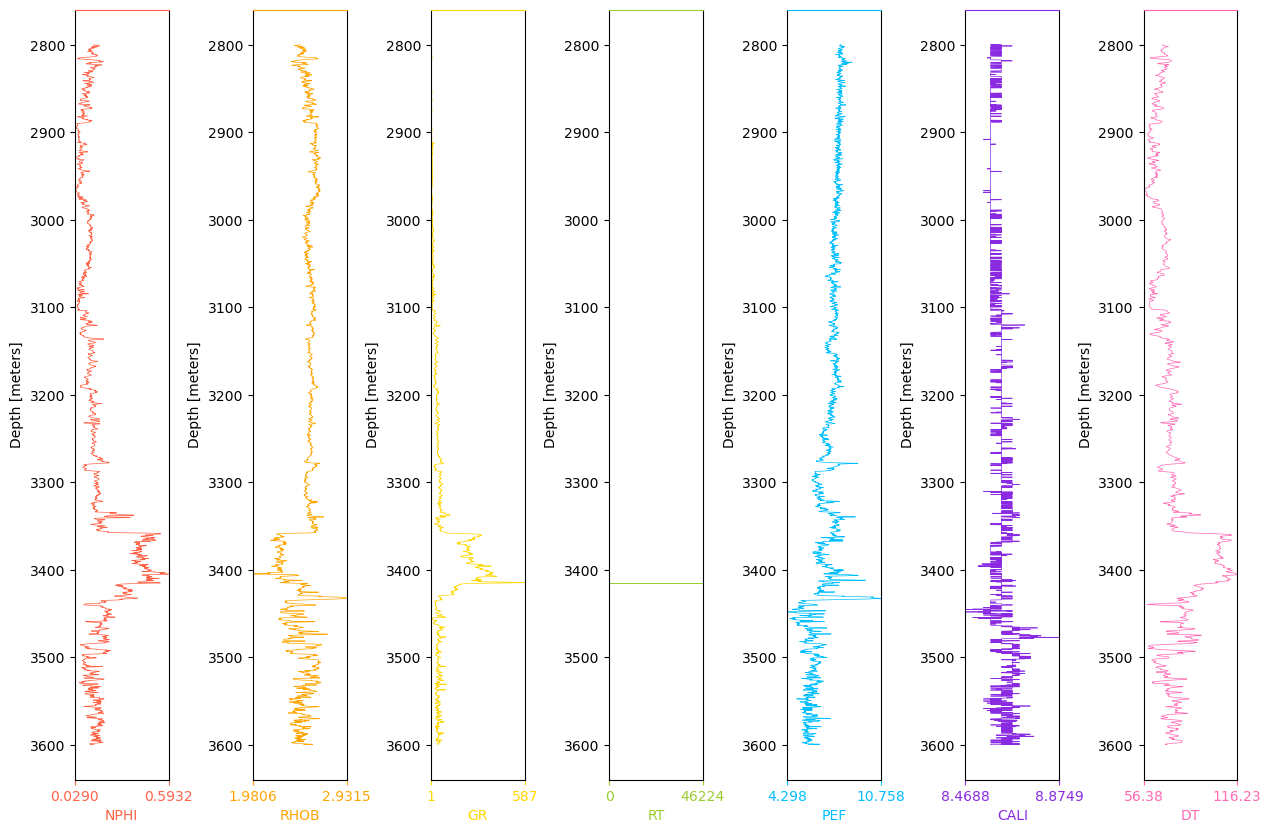

In [6]:
import matplotlib.pyplot as plt

# Set up the plot axes using the number of columns for this put ncols value len(df.columns), set figsize to 15x10
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(15, 10), gridspec_kw=dict(wspace=0.9))

# Define a list of 7 colors - see website https://matplotlib.org/stable/gallery/color/named_colors.html for ccolor list
colors = ['tomato', 'orange', 'gold', 'yellowgreen', 'deepskyblue', 'blueviolet', 'hotpink']

# Write a loop over the all columns in dataframe, specify linewidth to 0.5
for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:, i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].yaxis.set_inverted(True)
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:, i].max())
    axs[i].set_ylabel('Depth [meters]')
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])

## Task 4 Can you notice something strange? What with RT curve? write your comment

A combination of values worth noticing happens at around 3400 meters depth. This is the only spot where the RT (resitivity) curve shows something unusual - there is a sudden and significant value increase whereas everywhere else it's nonexisting. This spike could suggests that at this depth, the rock formation has **very low conductivity**, which may indicate the **presence of hydrocarbons (oil or gas)**. This could also be a mistake in measurement but the first thesis is supported by **simultaneous high values of NPHI, GR, PEF and DT** at the same depth. Such combination suggests a **porous, possibly organic-rich formation**. This zone should be of **interest for further exploration**.

## Task 5 Check outliers - what is the outlier??

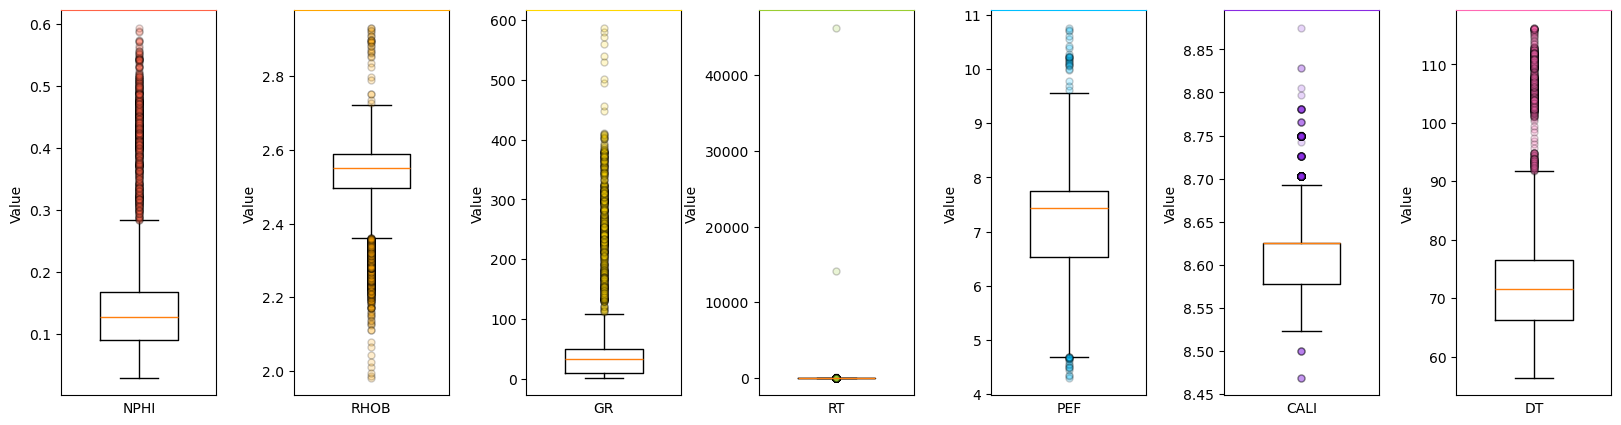

In [7]:
# Set up the plot axes similar as before but use the gig size 20,5
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# write a loop function similar as above

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], widths=(0.5), flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': colors[i], 'alpha': 0.2})
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Value")
    axs[i].set_xticks([])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

We need to remove weird high values of RT, but what to do with this observations? We can replace them using interpolation from the nearest samples

## Task 6 Correct RT curve

In [8]:
import numpy as np

# Replace RT log values greater than 100 with NaN
df.loc[df['RT'] > 100, 'RT'] = np.nan

# Interpolate NaN values based on nearest values
df['RT'] = df['RT'].interpolate(method='nearest')

# Print the resulting DataFrame
print(df)

          NPHI    RHOB       GR      RT     PEF    CALI       DT
DEPTH                                                           
2800.0  0.1425  2.4629   3.2562  1.7704  8.0126  8.5782  68.2803
2800.1  0.1416  2.4583   3.2575  1.7734  8.0124  8.6250  68.4759
2800.2  0.1436  2.4548   2.8439  1.8059  8.0316  8.6250  68.6693
2800.3  0.1454  2.4504   2.4479  1.8467  8.0325  8.6249  68.7748
2800.4  0.1509  2.4438   3.0292  1.9006  7.9983  8.5781  68.8805
...        ...     ...      ...     ...     ...     ...      ...
3599.6  0.1289  2.5771  44.3674  2.3147  6.1787  8.5781  70.1850
3599.7  0.1259  2.5490  43.5794  2.3004  5.9839  8.5781  70.3162
3599.8  0.1312  2.5246  44.6774  2.2336  5.8875  8.5781  70.5137
3599.9  0.1365  2.5003  45.4844  2.1827  5.7913  8.5781  70.7711
3600.0  0.1470  2.4950  47.8596  2.1170  5.7226  8.5784  71.3462

[8001 rows x 7 columns]


### See if it helped! We will visualize data again

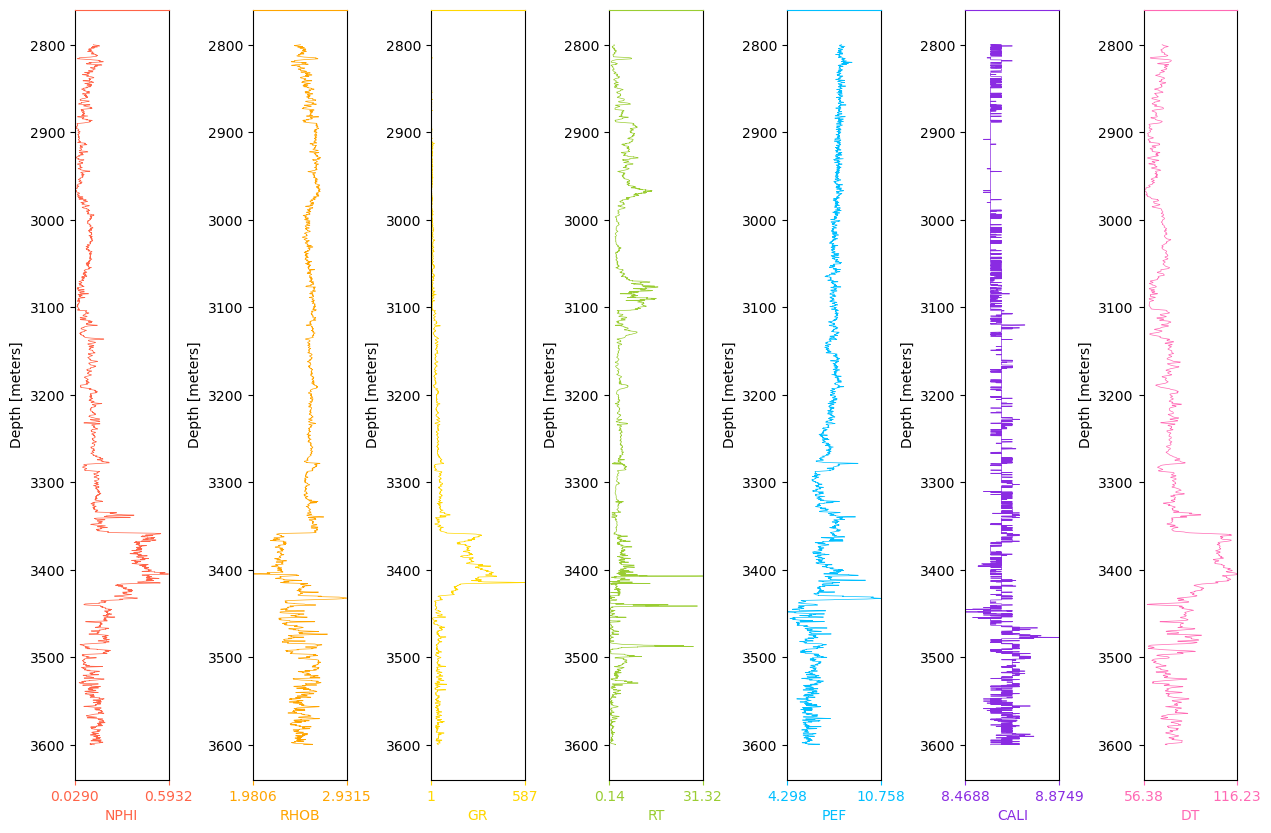

In [9]:
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(15, 10), gridspec_kw=dict(wspace=0.9))

# Define a list of 7 colors - see website https://matplotlib.org/stable/gallery/color/named_colors.html for ccolor list
colors = ['tomato', 'orange', 'gold', 'yellowgreen', 'deepskyblue', 'blueviolet', 'hotpink']

# Write a loop over the all columns in dataframe, specify linewidth to 0.5
for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:, i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].yaxis.set_inverted(True)
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:, i].max())
    axs[i].set_ylabel('Depth [meters]')
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])

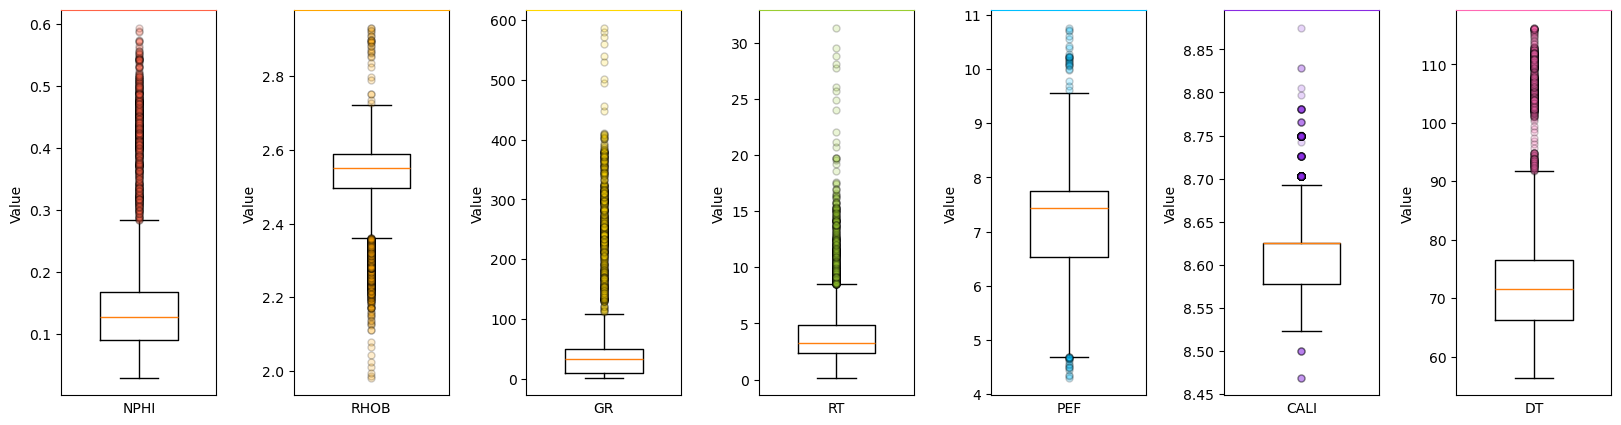

In [10]:
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# write a loop function similar as above

for i, col in enumerate(df.columns):
    axs[i].boxplot(df[col], widths=(0.5), flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': colors[i], 'alpha': 0.2})
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Value")
    axs[i].set_xticks([])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

## Task 7 check the outliers visualization using seaborn library

check the seaborn website: https://seaborn.pydata.org/examples/index.html
write in the comment 3 visualizations that you can use in your daily tasks

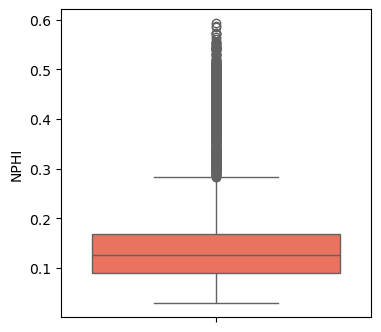

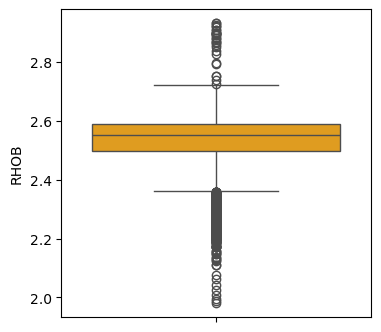

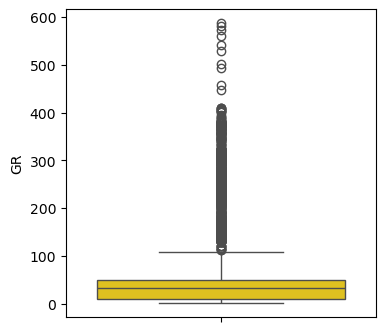

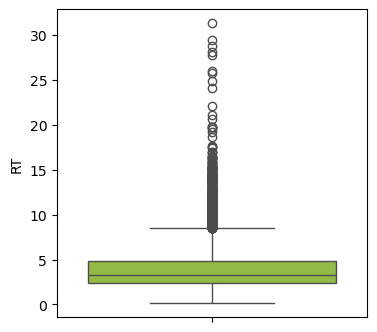

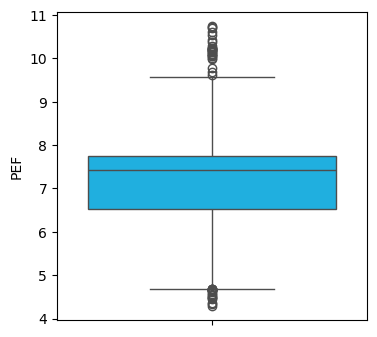

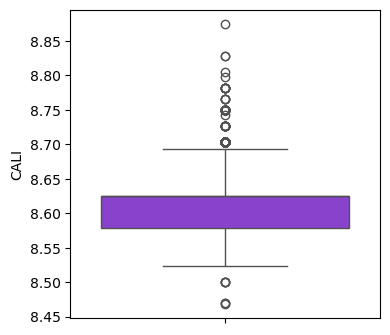

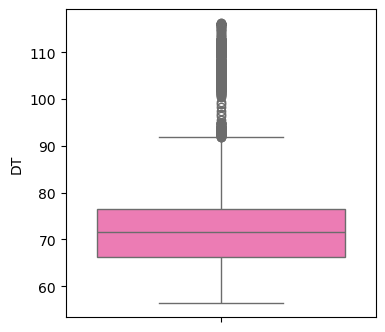

In [11]:
import seaborn as sns


for i, col in enumerate(df.columns):
    fig, ax = plt.subplots(figsize=(4, 4))
    sns.boxplot(y=df[col], color=colors[i], orient='v')

 

Most of the features have outliers that are bigger than IQ Range rather than smaller. This can suggest right-skewed distribution. Some columns have much more outliers than other ones but generally we can say that all of them have a lot. This is a natural part of collecting geological data. It can be the effect of a measurement error, presence of specific subgroups or just a real image of what the world down there is like.

## Task 8 - Remove outliers that are 3 standard deviations from the mean in window of 100 samples

In [12]:
# set window size to 100
window_size = 100

# calculate z-scores for each column using rolling window
z_scores = (df - df.rolling(window_size).mean()) / df.rolling(window_size).std()

# remove rows where any z-score is greater than 3
df_noout = df[(np.abs(z_scores) < 3).all(axis=1)]

# print cleaned dataframe
print(df_noout)

          NPHI    RHOB       GR      RT     PEF    CALI       DT
DEPTH                                                           
2809.9  0.1427  2.4589   4.2370  2.0991  7.9082  8.6249  70.0120
2810.0  0.1402  2.4615   4.1468  2.0325  7.9031  8.5782  69.9705
2810.1  0.1393  2.4696   4.2389  1.9359  7.9372  8.6015  69.8849
2810.2  0.1348  2.4811   3.6711  1.8266  7.9944  8.5781  69.7992
2810.3  0.1309  2.4924   2.8638  1.7334  8.0531  8.5781  69.7205
...        ...     ...      ...     ...     ...     ...      ...
3599.0  0.1207  2.4931  41.2866  1.4664  5.8496  8.7030  71.5955
3599.1  0.1200  2.5050  42.4855  1.6046  6.0435  8.6718  71.1964
3599.2  0.1240  2.5236  42.9226  1.7066  6.2858  8.6252  70.8162
3599.9  0.1365  2.5003  45.4844  2.1827  5.7913  8.5781  70.7711
3600.0  0.1470  2.4950  47.8596  2.1170  5.7226  8.5784  71.3462

[6618 rows x 7 columns]


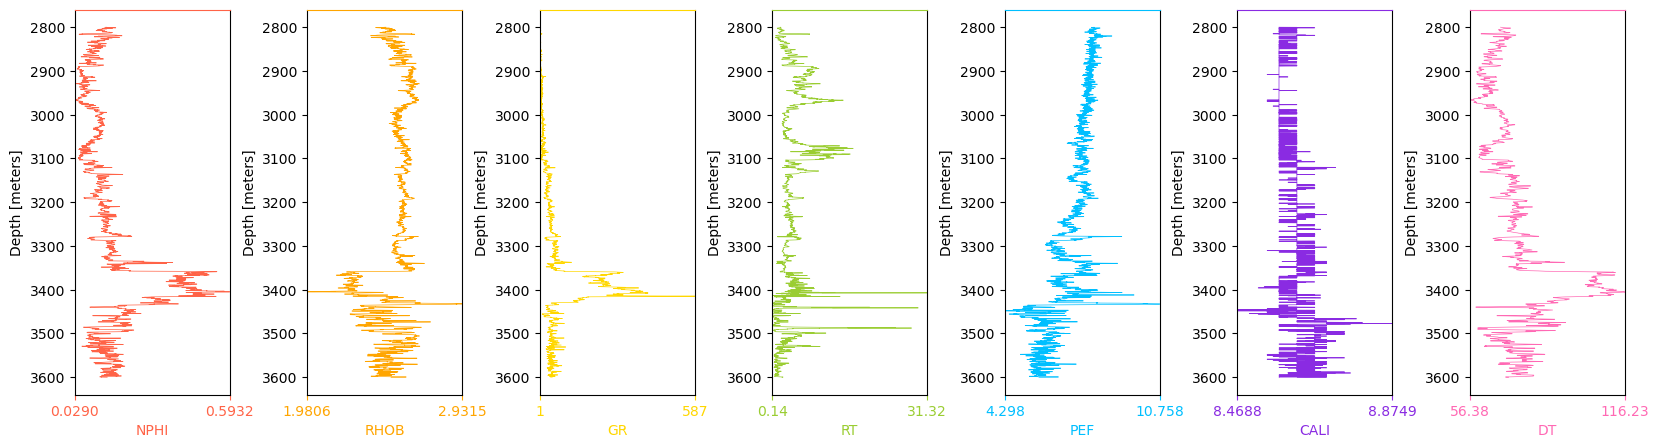

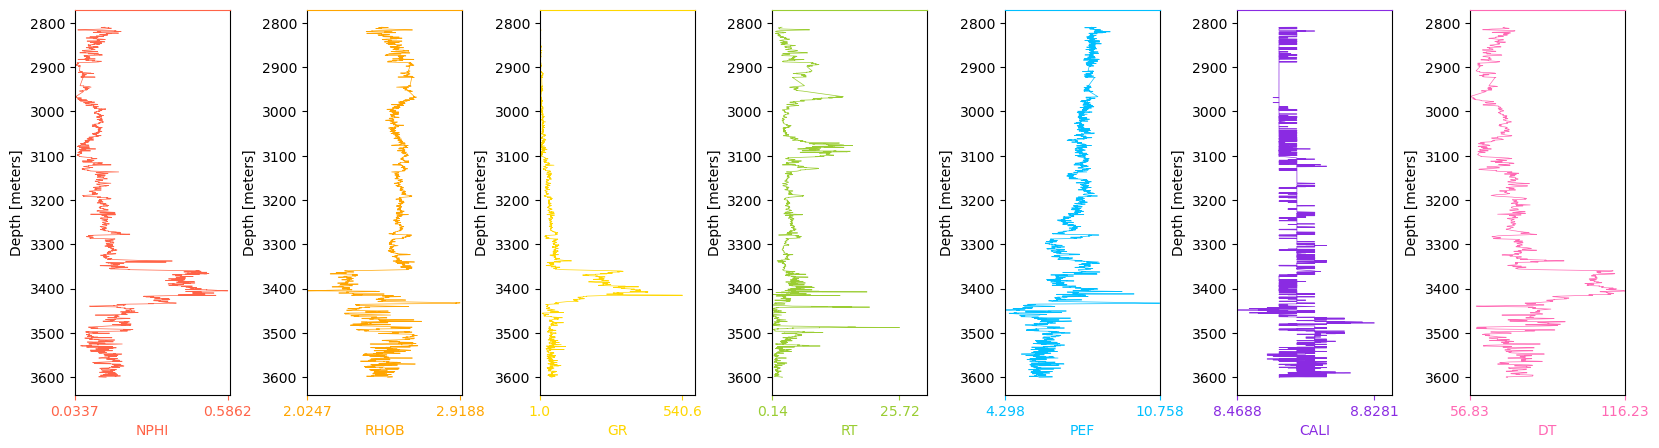

In [13]:


# Set up the plot axes
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))


# make a for loop for visualization using df dataset 

for i, col in enumerate(df.columns):
    axs[i].plot(df.iloc[:, i], df.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].yaxis.set_inverted(True)
    axs[i].set_xlim(df.iloc[:,i].min(), df.iloc[:, i].max())
    axs[i].set_ylabel('Depth [meters]')
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df.iloc[:,i].min(), df.iloc[:,i].max()])
# Set up the plot axes
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# make a for loop for visualization using df_noout dataset 

for i, col in enumerate(df_noout.columns):
    axs[i].plot(df_noout.iloc[:, i], df_noout.index, color=colors[i], linewidth=0.5)
    axs[i].set_xlabel(col)
    axs[i].xaxis.label.set_color(colors[i])
    axs[i].yaxis.set_inverted(True)
    axs[i].set_xlim(df_noout.iloc[:,i].min(), df.iloc[:, i].max())
    axs[i].set_ylabel('Depth [meters]')
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])
    axs[i].set_xticks([df_noout.iloc[:,i].min(), df_noout.iloc[:,i].max()])

# Step 2 - Exploratory Data Analysis
EDA (Exploratory Data Analysis) is the process of analyzing and visualizing data in order to extract insights, patterns, and trends. It is typically one of the first steps in data analysis and is used to gain a better understanding of the data and its characteristics. EDA can help identify outliers, missing values, and any other issues with the data that may need to be addressed before further analysis. It can also help in selecting appropriate statistical methods and models for data analysis. EDA involves using a range of techniques such as histograms, scatter plots, box plots, and correlation matrices to explore the data visually and identify relationships between variables. EDA is an important part of data science and plays a crucial role in the data analysis process.

## Histograms

Histograms are graphical representations of the distribution of data. They display the frequency distribution of a variable by creating a set of contiguous and non-overlapping intervals (or bins) along the range of the variable and then plotting the count or proportion of observations that fall within each bin. By examining a histogram, one can see the central tendency, variability, and shape of the distribution of the data. Additionally, it can also help identify any outliers or unusual patterns in the data. Overall, histograms are useful for understanding the distribution of a variable and gaining insight into the underlying patterns and characteristics of the data.

**Optimal bin size**

**Freedman-Diaconis rule** is a method for determining the bin width of a histogram in statistical data analysis. The rule uses the interquartile range (IQR) of the data and the total number of samples to calculate an appropriate bin width. The bin width is important because it determines the smoothness of the histogram and can affect the interpretation of the data. The Freedman-Diaconis rule aims to create a histogram with sufficient detail to reveal the underlying distribution of the data while avoiding oversmoothing or undersmoothing. It is considered a robust method for determining bin width because it is less sensitive to outliers than other methods such as Sturges' rule or Scott's rule. The Freedman-Diaconis rule has been widely adopted in various fields, including economics, environmental science, and medical research.

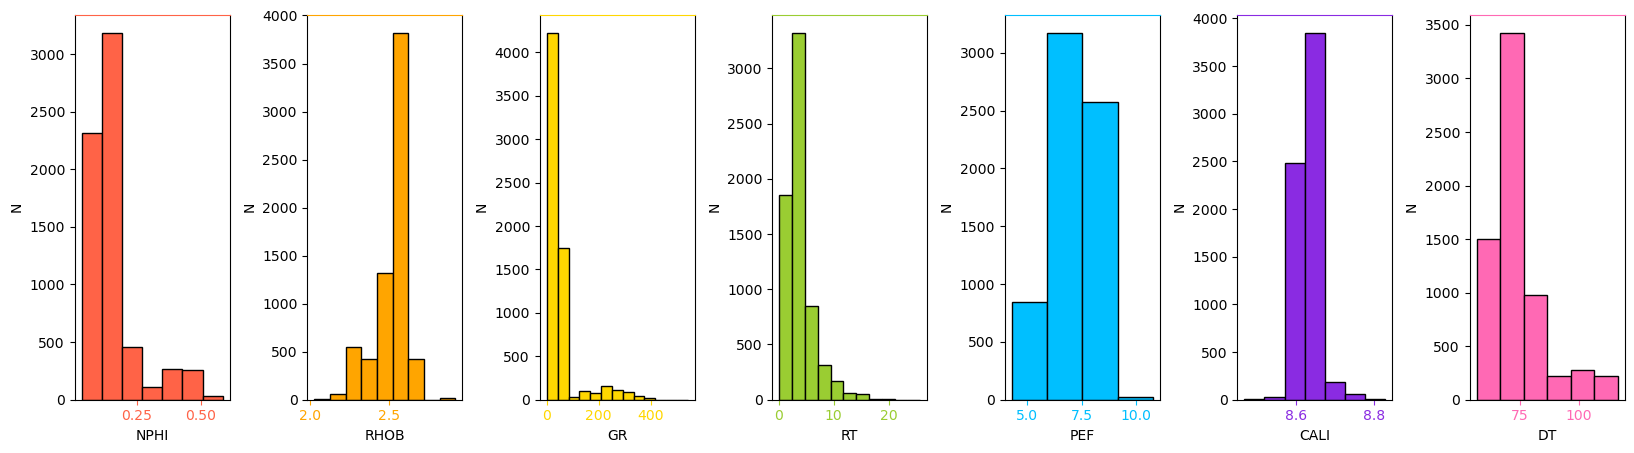

In [14]:
# Set up the plot axes as before, use size 20,5
fig, axs = plt.subplots(ncols=len(df.columns), figsize=(20, 5), gridspec_kw=dict(wspace=0.5))

#write a loop 
for i, col in enumerate(df_noout.columns):
                        
    # Calculate the bin size using the Freedman-Diaconis rule
    # specify the quartiles 
    q75, q25 = np.percentile(df_noout[col], [75, 25])
    # calculate iqr (interquartile range)                
    iqr = q75 - q25
    
    # calculate the width as h equals to double iqr divided by the cube root of the number of observation -> n = len(df[col])                  
    h =  (2*iqr / len(df.columns) ** (1/3))
    bins = int((df_noout[col].max() - df_noout[col].min()) / h)

    axs[i].hist(df_noout[col], bins=bins, color=colors[i], edgecolor='black')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("N")
    axs[i].tick_params(axis='x', colors=colors[i])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

## Pairplot
A pairplot is a graphical tool used in data analysis and visualization that creates pairwise scatterplots and histograms for a given dataset. It is a useful method for exploring the relationship between multiple variables in a dataset. Each scatterplot in the pairplot shows the relationship between two variables in the dataset, while the histograms show the distribution of each variable individually.

By examining the pairplot, we can gain insights into the relationships between variables in the dataset. We can identify variables that are strongly correlated, positively or negatively, as well as variables that are not correlated at all. We can also see the distribution of each variable, including whether they are normally distributed or skewed, and identify any outliers. Pairplots can be useful for identifying potential patterns or trends in the data, as well as for detecting any issues with the data, such as missing or erroneous values. Overall, pairplots are a useful tool for exploratory data analysis and for gaining a better understanding of the relationships between variables in a dataset.

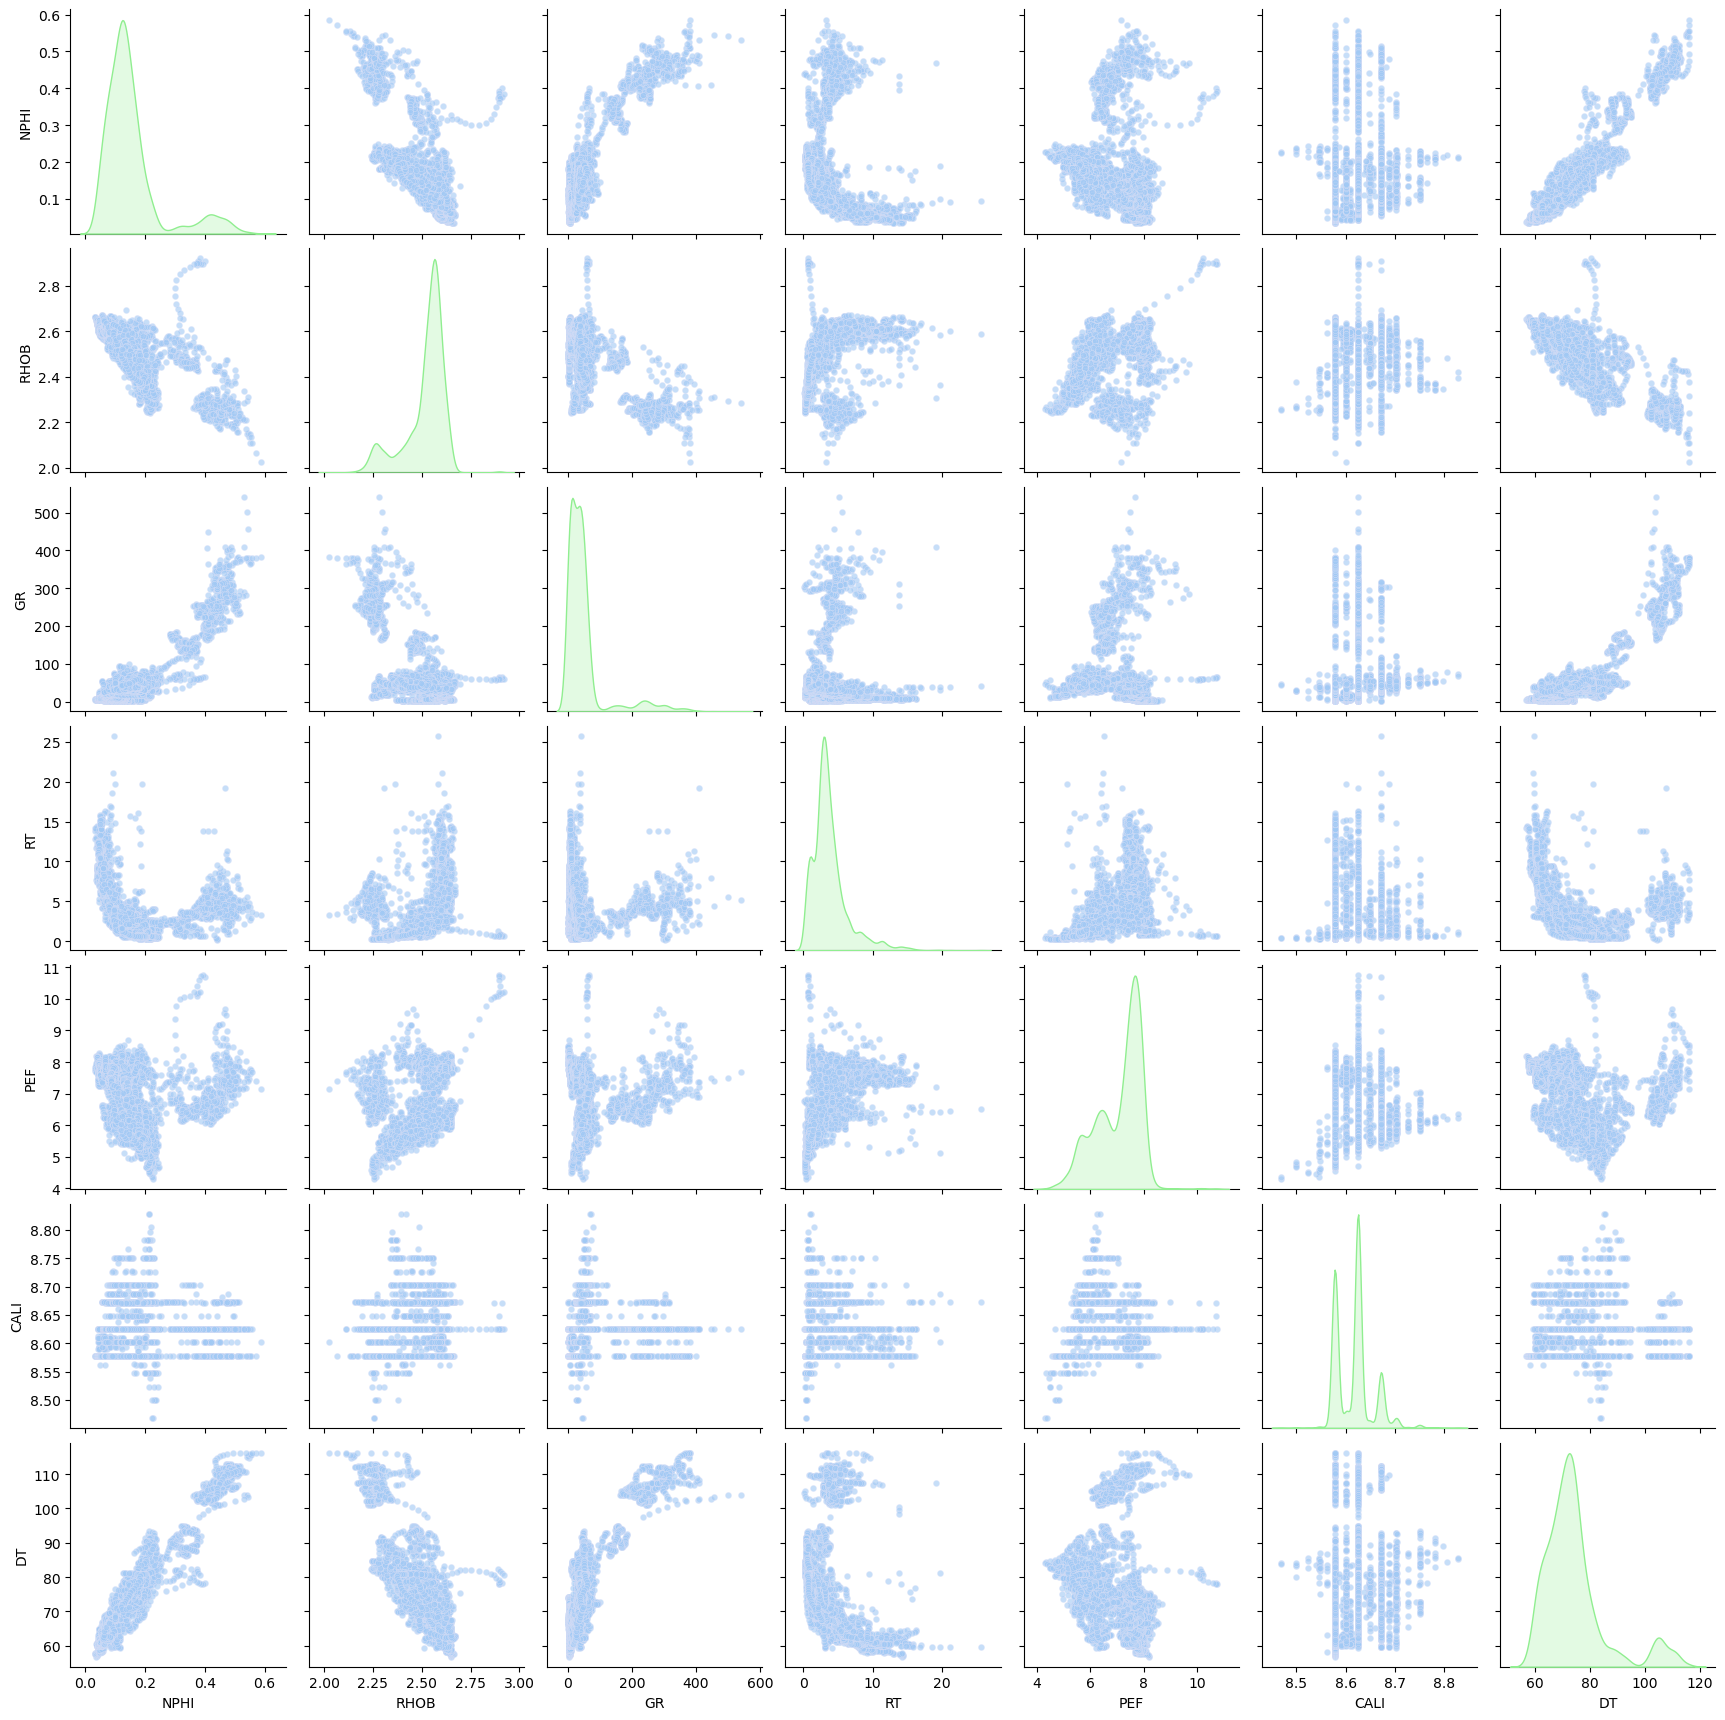

In [15]:
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Define colors for histograms and scatters
hist_color = 'lightgreen'
scatter_color = 'lavender'

# Set the color palette
sns.set_palette("pastel")

# Create pairplot with different colors for histograms and scatters put as vars your column list, and use diag_kind as 'kde', specify size s as 20
sns.pairplot(df_noout, vars=df_noout.columns, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': scatter_color},
             diag_kws = {'color': hist_color})

Pairplots allow us to see correlations, also these which are not linear. An example of a linear correlation would be the combination of **DT** and **NPHI** or **DT** and **RHOB**. A suggestion of a non-linear pair is **NPHI** with **GR** or **NPHI** and **RT**. Another observation worth noticing is that almost all of the feature pairs create a dense cloud with strong edges. Majority of points are condensed together with very little outliers. This figure also presents the distributions of every column. The only one that stands out is **CALI** with three clear clusters. All the other distributions have one strong center with a visible skewness or with one more smaller data accumulation.

## Correlation matrix 

Correlation matrix is a table that displays the correlation coefficients between different variables in a dataset. It is commonly used in statistics and data analysis to identify patterns and relationships between variables.

The correlation coefficient is a statistical measure that ranges from -1 to 1, indicating the strength and direction of the linear relationship between two variables. A value of 1 indicates a perfect positive correlation, meaning that when one variable increases, the other variable increases proportionally. A value of -1 indicates a perfect negative correlation, meaning that when one variable increases, the other variable decreases proportionally. A value of 0 indicates no correlation, meaning that there is no relationship between the variables.

The correlation matrix is a square matrix where the diagonal contains the correlation coefficient between each variable and itself, which is always 1. The upper and lower triangles of the matrix contain the correlation coefficients between each pair of variables, with duplicates reflected across the diagonal. A correlation matrix can be visualized as a heat map, where the color of each cell represents the magnitude of the correlation coefficient. Correlation matrices are commonly used in data analysis, machine learning, and other applications to identify relationships between variables, detect multicollinearity, and perform feature selection.

<Axes: >

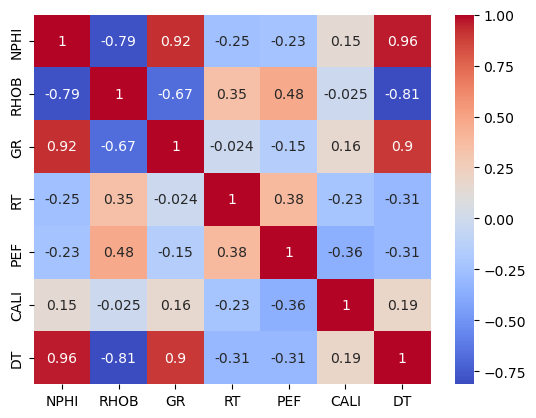

In [16]:
# Define the features to include in the correlation matrix
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Calculate the correlation matrix using the following synthax dataframe[columsn].corr()
corr_matrix = df_noout[cols].corr()

# Set the color palette
sns.set_palette("pastel")

# Create a heatmap of the correlation matrix, set annot to True
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

The matrix above shows many strong linear correlations both positive and negtive. In the conext od geological data, such correlations may indicate **lithological consistency** and the **physical properties** of rock formations. The presence of strong values also means that some variables may be redundant, which is important to consider when building predictive models.

# Step 3 - data normalization

Data normalization, also known as feature scaling, is the process of transforming data into a common scale or range in order to facilitate data analysis and improve the performance of machine learning algorithms. Normalization is important because many machine learning algorithms are sensitive to the scale and distribution of input features, and may perform poorly or inaccurately if the features are not on a similar scale.

Normalization involves rescaling the features of a dataset to have a mean of 0 and a standard deviation of 1, or scaling the features to a range between 0 and 1. The normalization method used depends on the specific data and the requirements of the analysis or algorithm being used. Common methods of normalization include Min-Max scaling, Z-score normalization, and Log transformation.

Min-Max scaling involves scaling the features to a range between 0 and 1, where the minimum value of the feature is transformed to 0 and the maximum value is transformed to 1. Z-score normalization involves transforming the features so that they have a mean of 0 and a standard deviation of 1, which can be accomplished by subtracting the mean from each value and then dividing by the standard deviation. Log transformation is another normalization technique used for data that is highly skewed or has a wide range of values, and involves applying a logarithmic function to the data to transform it into a more normal distribution.

Overall, data normalization is an important preprocessing step in data analysis and machine learning, as it can help to improve the accuracy and performance of models and algorithms, reduce overfitting, and ensure that features are on a similar scale.


## 3.1 - Transform Resitivity Log to log scale

Resistivity data in well logs is typically measured in ohm-meters, and the values can span several orders of magnitude, making it difficult to visualize and analyze the data directly. To address this issue, resistivity data is often transformed using a logarithmic scale, which compresses the data into a more manageable range.

The logarithmic scale is a nonlinear scale that compresses large values into a smaller range, while expanding small values. This allows for a more accurate visualization of the data and makes it easier to identify patterns and trends. In particular, the use of logarithmic scales is useful for resistivity data because the range of resistivity values encountered in well logs can be very large, spanning several orders of magnitude.

In [17]:
df_noout['RT'] = np.log10(df_noout['RT'])

C:\Users\1\AppData\Local\Temp\ipykernel_32820\3476924017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noout['RT'] = np.log10(df_noout['RT'])


In [18]:
#check data
df_noout['RT']

DEPTH
2809.9    0.322033
2810.0    0.308031
2810.1    0.286883
2810.2    0.261643
2810.3    0.238899
            ...   
3599.0    0.166252
3599.1    0.205367
3599.2    0.232132
3599.9    0.338994
3600.0    0.325721
Name: RT, Length: 6618, dtype: float64

## 3.2 - Transform data with skewed distribution
The power transform with Yeo-Johnson method is a data transformation technique used to normalize a dataset that has a skewed distribution. It is a variant of the Box-Cox transformation, which is used to normalize data that has a positive skew.

The Yeo-Johnson method is a modified version of the Box-Cox transformation that can be applied to both positively and negatively skewed data, as well as data that includes zero or negative values. It works by applying a power transformation to the data that varies based on the value of a lambda parameter, which is estimated from the data.

The Yeo-Johnson method is implemented in the PowerTransformer class of the scikit-learn library in Python. It can be used to transform a pandas DataFrame or numpy array to have a more normal distribution, which can be useful for machine learning models that assume a normal distribution of the data.

In [19]:
from IPython.display import Image
Image(url="https://i.postimg.cc/sDRksm7T/2.png")

In [20]:
#import necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
import pandas as pd

#define the columns to be transformed
numeric_features = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']#[col1, col2, ..., col3]

#define the transformation pipeline using PowerTransformer with Yeo-Johnson method and standardization
numeric_transformer = Pipeline(steps=[
('scaler', PowerTransformer(method='yeo-johnson', standardize=True))
])

#define the ColumnTransformer to apply the transformation pipeline to the numeric features
preprocessor = ColumnTransformer(transformers=[
('num', numeric_transformer, numeric_features)
])

#fit and transform the data using the preprocessor
transformed_data = preprocessor.fit_transform(df_noout[numeric_features])

#convert the transformed data to a DataFrame with column names and add the depth column from the original data
transformed_data = pd.DataFrame(transformed_data, columns=numeric_features)
transformed_data['DEPTH'] = df_noout.reset_index()['DEPTH']
transformed_data = transformed_data.set_index('DEPTH')

In [21]:
transformed_data

,NPHI,RHOB,GR,RT,PEF,CALI,DT
DEPTH,,,,,,,
2809.9,0.205930,-0.745286,-1.564246,-0.607747,1.055451,8.187895e-16,-0.211915
2810.0,0.167616,-0.721726,-1.581017,-0.649998,1.047754,-3.830269e-15,-0.217361
2810.1,0.153634,-0.647008,-1.563896,-0.712988,1.099386,-1.471046e-15,-0.228633
2810.2,0.082195,-0.537420,-1.674785,-0.786870,1.186874,-3.830269e-15,-0.239972
2810.3,0.018157,-0.425602,-1.859007,-0.852242,1.277809,-3.830269e-15,-0.250432
...,...,...,...,...,...,...,...
3599.0,-0.159180,-0.418538,0.391791,-1.053360,-1.395774,7.965850e-15,-0.013084
3599.1,-0.171897,-0.295911,0.417180,-0.946528,-1.216829,5.204170e-15,-0.061596
3599.2,-0.100195,-0.094388,0.426257,-0.871470,-0.979093,8.604228e-16,-0.108796


## DRAW Pairplot using transformed data


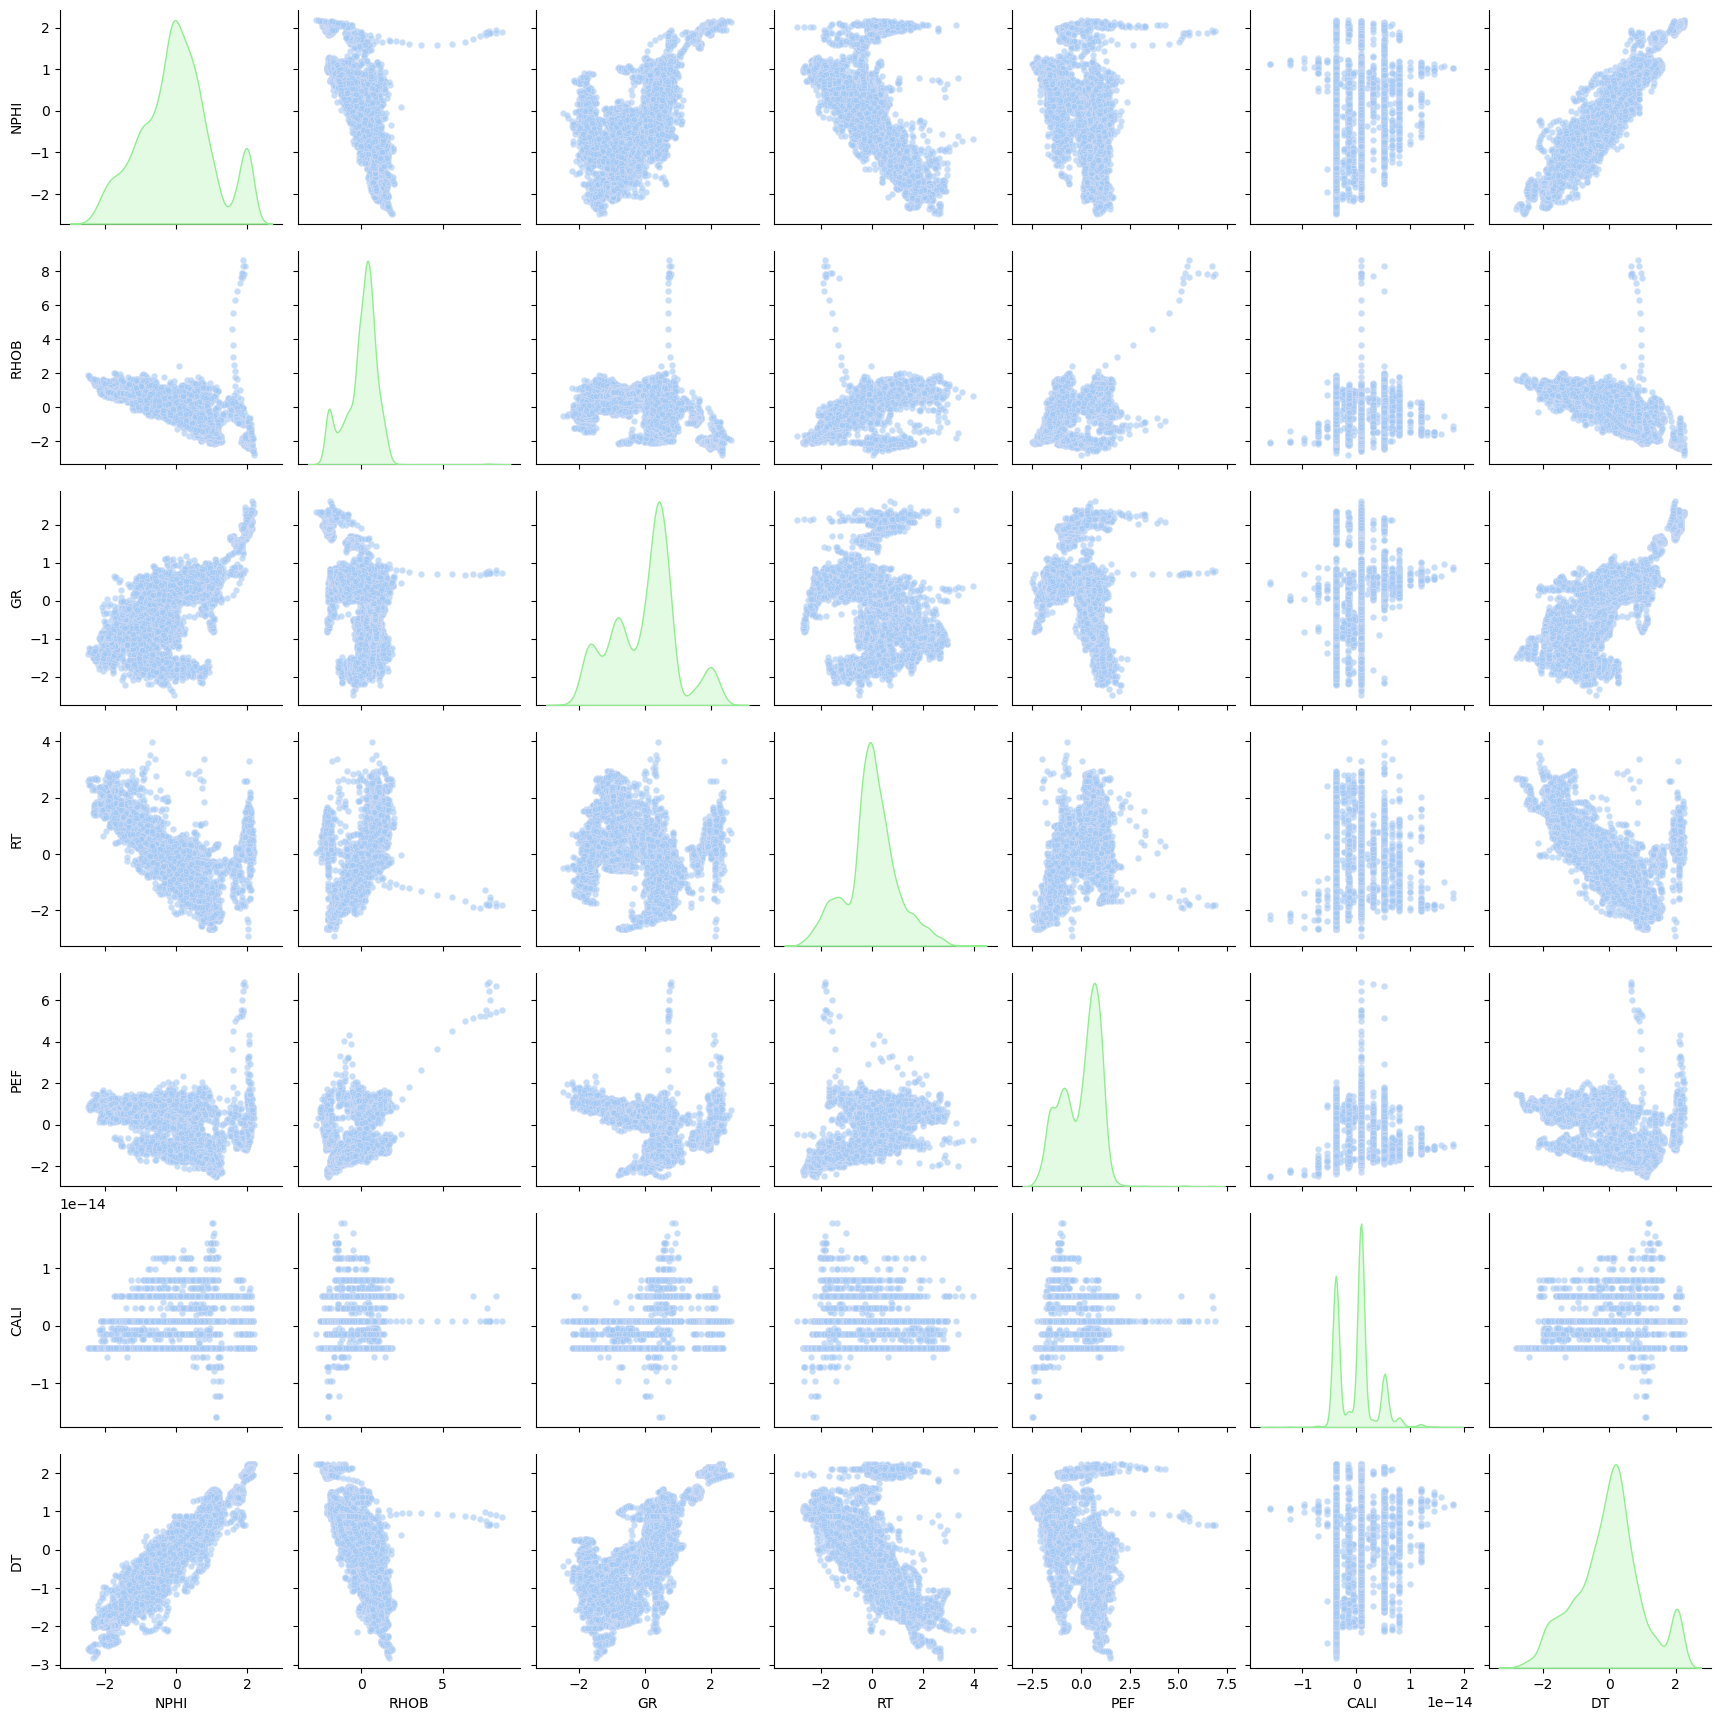

In [22]:
cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

# Define colors for histograms and scatters
hist_color = 'lightgreen'
scatter_color = 'lavender'

# Set the color palette
sns.set_palette("pastel")

# Create pairplot with different colors for histograms and scatters put as vars your column list, and use diag_kind as 'kde', specify size s as 20
sns.pairplot(transformed_data, vars=transformed_data.columns, diag_kind='kde',
             plot_kws = {'alpha': 0.6, 's': 20, 'edgecolor': scatter_color},
             diag_kws = {'color': hist_color})

## DRAW boxplots using transformed data


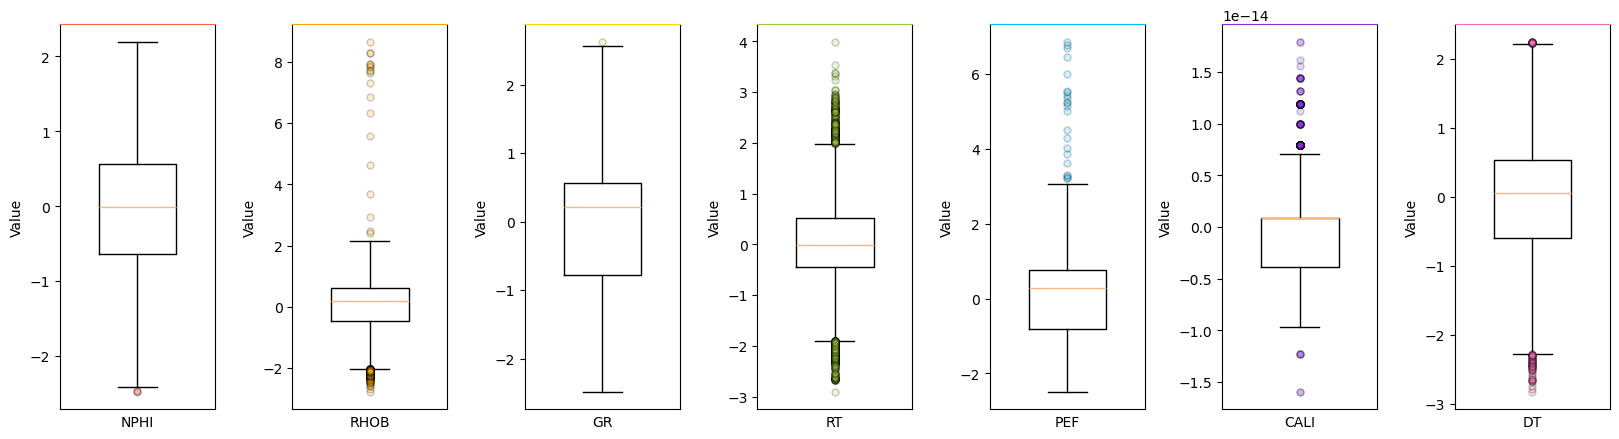

In [23]:
fig, axs = plt.subplots(ncols=len(transformed_data.columns), figsize=(20,5), gridspec_kw=dict(wspace=0.5))

# write a loop function similar as above

for i, col in enumerate(transformed_data.columns):
    axs[i].boxplot(transformed_data[col], widths=(0.5), flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': colors[i], 'alpha': 0.2})
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Value")
    axs[i].set_xticks([])
    axs[i].spines["top"].set_edgecolor(colors[i])
    axs[i].title.set_color(colors[i])

Transformed data contains much less outliers than previous data. Normalization makes it easier to see the distributions.

# Step 4 - final outlier removal using ML

**The Isolation Forest** algorithm is a type of computer program that helps find "outliers" in data. Outliers are data points that are very different from all the other data points. For example, imagine you have a list of test scores from your class, and one student got a score that is much higher or lower than everyone else. That student's score would be an outlier.

The Isolation Forest algorithm works by putting each data point in a "tree". Each tree has branches that divide the data into smaller and smaller groups. The algorithm keeps dividing the data until each point is in its own group, or until a certain number of groups have been made. This is like playing a game of "guess who" where you try to guess a character by asking yes-or-no questions, and keep dividing the characters into smaller groups until you know who the character is.

Once the data points are divided into groups, the algorithm looks at how many times each point was in a group with other points. If a point was in a group with other points many times, it is not an outlier. But if a point was in a group by itself many times, it is an outlier.

The Isolation Forest algorithm can be useful for finding outliers in data, which can be helpful in many different fields like finance, healthcare, and more.

In [24]:
from IPython.display import Image
Image(url="https://miro.medium.com/v2/resize:fit:1100/format:webp/1*D78QLbcwXesymhquuofnOg.png")

In [25]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest

In [26]:
# Define the numerical columns in your DataFrame
numeric_cols = ['NPHI', 'RHOB', 'GR', 'RT', 'PEF', 'CALI', 'DT']

In [27]:
# Instantiate the isolation forest for each column separately
isos = {}
for col in numeric_cols:
    iso = IsolationForest(n_estimators=100, max_samples='auto', contamination=float(0.05), random_state=42)
    iso.fit(transformed_data[col].values.reshape(-1, 1))
    isos[col] = iso


In [28]:
# Replace the outliers with the mean of neighboring values for each column in a single loop
for col in numeric_cols:
    outliers = isos[col].predict(transformed_data[col].values.reshape(-1, 1)) == -1
    values = transformed_data[col].values
    mean = np.mean(values[~outliers])
    for i in range(len(values)):
        if outliers[i]:
            # Replace outlier with the mean of neighboring values
            if i == 0:
                values[i] = values[i+1]
            elif i == len(values)-1:
                values[i] = values[i-1]
            else:
                values[i] = (values[i-1] + values[i+1])/2
    transformed_data[col] = values

In [29]:
# Fill any remaining NaN values with interpolated values
transformed_data[numeric_cols] = transformed_data[numeric_cols].interpolate()


In [30]:

# Print the resulting DataFrame without outliers
print(transformed_data)

            NPHI      RHOB        GR        RT       PEF          CALI  \
DEPTH                                                                    
2809.9  0.205930 -0.745286 -1.564246 -0.607747  1.055451  8.187895e-16   
2810.0  0.167616 -0.721726 -1.581017 -0.649998  1.047754 -3.830269e-15   
2810.1  0.153634 -0.647008 -1.563896 -0.712988  1.099386 -1.471046e-15   
2810.2  0.082195 -0.537420 -1.674785 -0.786870  1.186874 -3.830269e-15   
2810.3  0.018157 -0.425602 -1.859007 -0.852242  1.277809 -3.830269e-15   
...          ...       ...       ...       ...       ...           ...   
3599.0 -0.159180 -0.418538  0.391791 -1.053360 -1.395774  7.965850e-15   
3599.1 -0.171897 -0.295911  0.417180 -0.946528 -1.216829  5.204170e-15   
3599.2 -0.100195 -0.094388  0.426257 -0.871470 -0.979093  8.604228e-16   
3599.9  0.109486 -0.344918  0.477658 -0.555989 -1.447658 -3.830269e-15   
3600.0  0.270070 -0.399279  0.522775 -0.596548 -1.507675 -3.816392e-15   

              DT  
DEPTH             

## DRAW boxplots for transformed_data


# Step 5 - Facies analysis
Facies analysis from well logs is an important task in petroleum geology. It involves identifying and classifying the different rock types, or facies, encountered in a well. Traditionally, this has been done by geologists through visual inspection of the well logs. However, with the rise of machine learning techniques, it has become possible to automate this process.

One common approach to facies analysis is to use unsupervised clustering algorithms, such as K-means or hierarchical clustering, to group similar sections of the well log together. The goal is to identify natural groupings, or clusters, of log responses that correspond to different facies. Once the clusters have been identified, the geologist can assign each cluster to a specific facies based on their knowledge of the local geology.

To perform facies analysis using machine learning clustering, several well logs are typically collected and pre-processed. The logs are usually normalized and scaled to make them comparable, and any missing data is imputed or removed. Features, such as gamma-ray, resistivity, and porosity, are extracted from the logs and used as inputs to the clustering algorithm.

Once the features have been extracted, a clustering algorithm is applied to group the sections of the well log that have similar responses. The algorithm assigns each section to a cluster, which can be visualized on a plot. The plot can help identify any clear patterns or trends in the data and help the geologist make sense of the clustering results.

The next step is to assign each cluster to a specific facies. This is done by comparing the clustering results to the geological knowledge of the area. The geologist may use other data sources, such as core samples or outcrop data, to help identify the facies associated with each cluster.

Once the clusters have been assigned to facies, the results can be used to create a facies log. This log can be used to interpret the geology of the well and to help identify potential hydrocarbon reservoirs or other geological features.

In [31]:
from IPython.display import Image
Image(url="https://interviewquery-cms-images.s3-us-west-1.amazonaws.com/ac5da238-25ab-48ef-839a-407a7b76a167.jpg")

## K-means 
is a type of unsupervised learning algorithm used for clustering data points into different groups or clusters based on the similarity of the data points. The algorithm works by iteratively assigning each data point to the nearest cluster center, and then computing the new cluster centers based on the mean of the assigned points. This process is repeated until the cluster centers no longer move significantly.

The algorithm requires the user to specify the number of clusters beforehand. The objective of the algorithm is to minimize the sum of squared distances between each data point and its assigned cluster center, which is also known as the Within-Cluster-Sum-of-Squares (WCSS) metric.

The k-means algorithm can be divided into three main steps:

1. **Initialization:** The algorithm randomly selects k data points to act as initial cluster centers.

2. **Assignment:** Each data point is assigned to the nearest cluster center based on the Euclidean distance between the point and the center.

3. **Update:** The mean of the data points assigned to each cluster is computed, and this value is used as the new cluster center.

These three steps are repeated iteratively until the cluster centers no longer move significantly, or a maximum number of iterations is reached. The final output of the algorithm is the cluster assignments of each data point.

One of the main advantages of the k-means algorithm is its simplicity and scalability, which allows it to handle large datasets efficiently. However, the algorithm is sensitive to the initial placement of the cluster centers, and may converge to suboptimal solutions. In addition, the algorithm is not effective when dealing with non-linearly separable data. Nonetheless, k-means is widely used in various applications such as image segmentation, market segmentation, and anomaly detection.

In [32]:
from IPython.display import Image
Image(url="https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png?width=2000")

In [33]:
from sklearn.cluster import KMeans

# define features using cols
X = transformed_data[cols]

In [34]:
#define model set n_clusters to 10

model = KMeans(10)


In [35]:
# fit the model to data
y = model.fit_predict(X); y

array([3, 3, 3, ..., 2, 2, 2])

In [36]:
# save your data in numeric and string format
transformed_data['K10'] = y
transformed_data['K10_name'] = "Facies "+(transformed_data['K10']+1).astype('str')
transformed_data = transformed_data.reset_index()

## Print transformed_data what do you see?

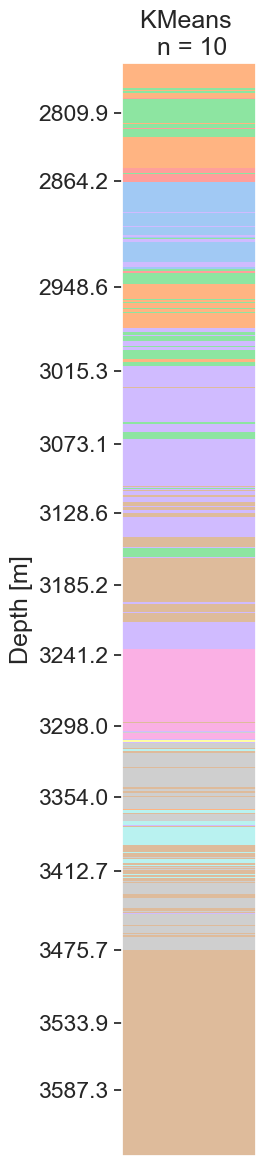

In [37]:
K5_graph = transformed_data.copy()
K5_graph['x'] = 1
sns.set_style("white")
sns.set(font_scale = 1.5)
plt.rcParams['xtick.major.size'] = 200
plt.rcParams['xtick.major.width'] = 40
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.figure(figsize=(3,12))
ax = sns.scatterplot(data=K5_graph, x='x', y='DEPTH', hue='K10_name', marker='s', s=50000, edgecolor='None', palette='pastel')
plt.tick_params(bottom=False, labelbottom=False)
plt.yticks(K5_graph['DEPTH'][::500])
plt.legend([],[], frameon=False)
plt.ylabel("Depth [m]")
plt.xlabel('')
plt.title("KMeans \n n = 10")
ax.invert_yaxis()
plt.tight_layout()
plt.rcParams.update({})

In [38]:
def score(n_clusters, data, cols):
    model = KMeans(n_clusters=n_clusters, max_iter=300, random_state=1234)
    X = transformed_data[cols]
    y = model.fit_predict(X)
    SSE = model.inertia_
    Silhouette = metrics.silhouette_score(X, y)
    CHS = metrics.calinski_harabasz_score(X, y)
    DBS = metrics.davies_bouldin_score(X, y)
    return {'SSE':SSE, 'Silhouette': Silhouette, 'Calinski_Harabasz': CHS, 'Davies_Bouldin':DBS, 'model':model}

In [39]:
df_cluster_scorer = pd.DataFrame()
df_cluster_scorer['n_clusters'] = list(range(2, 21))
df_cluster_scorer

,n_clusters
0,2
1,3
2,4
3,5
4,6
5,7
6,8
7,9
8,10
9,11


In [40]:
from sklearn import metrics



df_cluster_scorer['SSE'],df_cluster_scorer['Silhouette'],\
df_cluster_scorer['Calinski_Harabasz'], df_cluster_scorer['Davies_Bouldin'],\
df_cluster_scorer['model'] = zip(*df_cluster_scorer['n_clusters'].map(lambda row: score(row, transformed_data, cols).values()))

df_cluster_scorer

,n_clusters,SSE,Silhouette,Calinski_Harabasz,Davies_Bouldin,model
0,2,22239.334854,0.400871,5066.094623,1.008036,"KMeans(n_clusters=2, random_state=1234)"
1,3,17714.774446,0.360296,4024.430451,0.953045,"KMeans(n_clusters=3, random_state=1234)"
2,4,12443.160458,0.378488,4752.944029,0.941042,"KMeans(n_clusters=4, random_state=1234)"
3,5,9581.565189,0.396143,5122.370426,0.827744,"KMeans(n_clusters=5, random_state=1234)"
4,6,8406.763750,0.363733,4854.666934,0.944934,"KMeans(n_clusters=6, random_state=1234)"
5,7,7391.868661,0.365586,4751.666837,0.840729,"KMeans(n_clusters=7, random_state=1234)"
6,8,7116.625448,0.350367,4266.175429,1.005628,KMeans(random_state=1234)
7,9,6474.933749,0.358444,4184.108099,0.954318,"KMeans(n_clusters=9, random_state=1234)"
8,10,5459.549282,0.364801,4546.807560,0.883447,"KMeans(n_clusters=10, random_state=1234)"
9,11,5055.156291,0.345695,4471.658508,0.910427,"KMeans(n_clusters=11, random_state=1234)"


<Figure size 800x600 with 0 Axes>

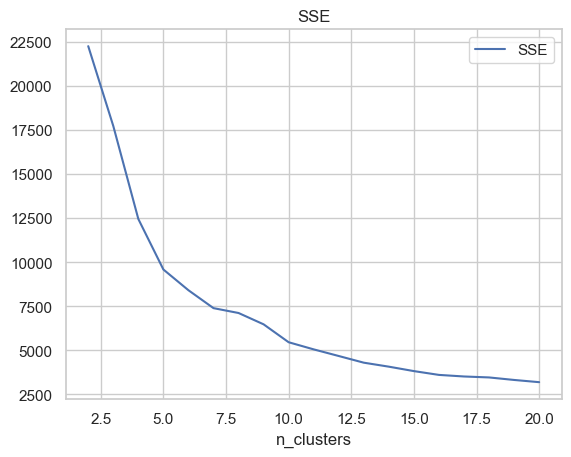

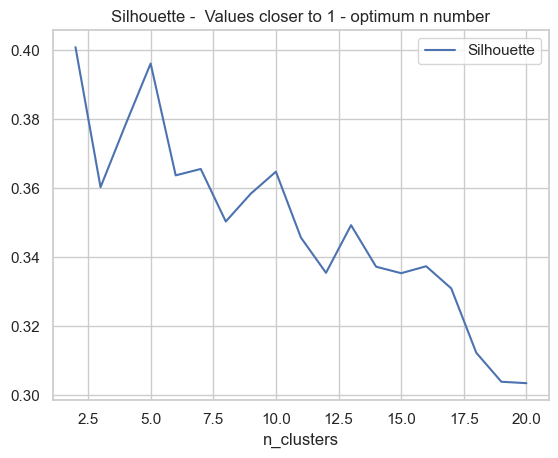

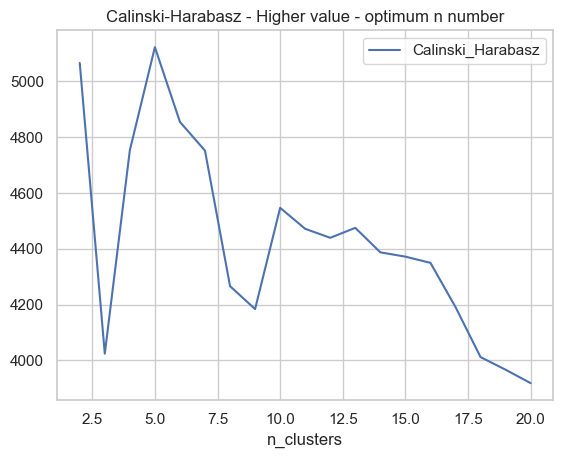

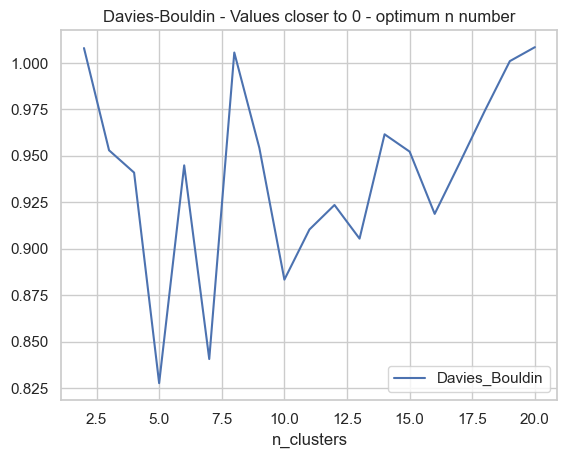

In [41]:
plt.rcParams.update({})
sns.set()
sns.set_style("whitegrid")


fig = plt.figure(figsize=(8, 6))


# Plot each graph on its own axis
df_cluster_scorer.plot.line(x='n_clusters', y='SSE', title="SSE")
df_cluster_scorer.plot.line(x='n_clusters', y='Silhouette', title="Silhouette -  Values closer to 1 - optimum n number")
df_cluster_scorer.plot.line(x='n_clusters', y='Calinski_Harabasz', title="Calinski-Harabasz - Higher value - optimum n number")
df_cluster_scorer.plot.line(x='n_clusters', y='Davies_Bouldin', title="Davies-Bouldin - Values closer to 0 - optimum n number")

#plt.tight_layout()
plt.show()

## Choose optimum number of clusters and predict!

Read about metrics here: https://www.mdpi.com/1996-1073/16/1/493 and describe why did you pick this number

The charts above suggest that the optimum number of clusters is **5**.

In [42]:
model = KMeans(5)
y = model.fit_predict(X); y

array([0, 0, 0, ..., 3, 4, 4])

In [43]:
# save your data in numeric and string format
transformed_data['K5'] = y
transformed_data['K5_name'] = "Facies "+(transformed_data['K5']+1).astype('str')
transformed_data = transformed_data.reset_index()

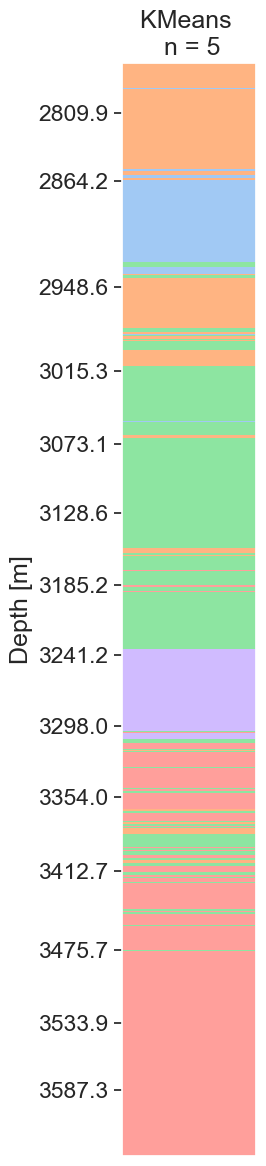

In [44]:
K5_graph = transformed_data.copy()
K5_graph['x'] = 1
sns.set_style("white")
sns.set(font_scale = 1.5)
plt.rcParams['xtick.major.size'] = 200
plt.rcParams['xtick.major.width'] = 40
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.figure(figsize=(3,12))
ax = sns.scatterplot(data=K5_graph, x='x', y='DEPTH', hue='K5_name', marker='s', s=50000, edgecolor='None', palette='pastel')
plt.tick_params(bottom=False, labelbottom=False)
plt.yticks(K5_graph['DEPTH'][::500])
plt.legend([],[], frameon=False)
plt.ylabel("Depth [m]")
plt.xlabel('')
plt.title("KMeans \n n = 5")
ax.invert_yaxis()
plt.tight_layout()
plt.rcParams.update({})

# Compare your results with the stratigrapy 
https://www.researchgate.net/publication/332441275_Estimation_of_Pore_Pressure_and_Fracture_Gradient_in_Volve_Field_Norwegian_North_Sea